In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tpot
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

c:\Users\wardj\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data = pd.read_csv('dataset.csv')
features = data.drop(columns='target')
x_train, x_test, y_train, y_test = \
    train_test_split(features, data['target'], random_state=1)

In [3]:
AutoML = tpot.TPOTClassifier(
                            generations=5,
                            population_size=100,
                            offspring_size=None,
                            mutation_rate=0.9,
                            crossover_rate=0.1,
                            scoring=None,
                            cv=5,
                            subsample=1.0,
                            n_jobs=1,
                            max_time_mins=None,
                            max_eval_time_mins=5,
                            random_state=1,
                            config_dict=None,
                            template=None,
                            warm_start=False,
                            memory=None,
                            use_dask=False,
                            periodic_checkpoint_folder=None,
                            early_stop=None,
                            verbosity=2,
                            disable_update_check=False,
                            )

In [4]:
AutoML.fit(x_train, y_train)

                                                                                
Generation 1 - Current best internal CV score: 0.9423037716615699
                                                                                  
Generation 2 - Current best internal CV score: 0.9423037716615699
                                                                                
Generation 3 - Current best internal CV score: 0.945973496432212
                                                                                   
Generation 4 - Current best internal CV score: 0.945973496432212
                                                                                
Generation 5 - Current best internal CV score: 0.9474006116207951
                                                              
Best pipeline: RandomForestClassifier(input_matrix, bootstrap=False, criterion=gini, max_features=0.35000000000000003, min_samples_leaf=1, min_samples_split=6, n_estimators=100)


TPOTClassifier(generations=5, random_state=1, verbosity=2)

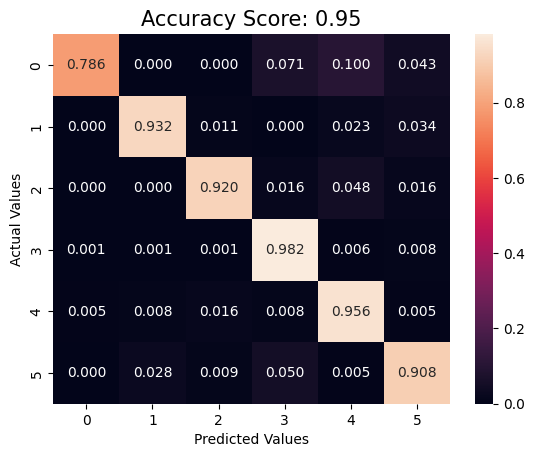

In [9]:
predictions = AutoML.predict(x_test)
score = round(accuracy_score(y_test, predictions), 3)
cm1 = cm(y_test, predictions, normalize='true')
sns.heatmap(cm1, annot=True, fmt=".3f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()

In [6]:
AutoML.export('pipeline_tpot.py')

1
